## Problem 8

I chose (through trial and error) the following function to make an egg:

$f(\theta) = \left[1 + \frac{1}{4} \sinh(\theta)\right]\sin\theta$

With this function, the cross-section is plotted below with the egg in black and the radius of the the line-of-constant-latitude in red near the maximum circumference. As this function is difficult to maximize (it's a transcendental equation), I wrote a Newton-Raphson method calculator to find the angle, $\theta$ where the circumference would be maximized.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def f(t):
    return np.sin(t) + (0.25*np.sinh(t)*np.sin(t))

In [9]:
def shape_plot():
    a = 1.0
    t = np.linspace(0,np.pi,1000)
    d = a*f(t)
    x_cor_p = d
    x_cor_n = -x_cor_p
    z_cor = a * np.pi * np.cos(t) #This should be not cos(t), but sqrt(1-f(t)^(2))
    #z_cor = a * np.sqrt(1-f(t)**(2))
    wmax = np.where(x_cor_p == np.amax(x_cor_p))[0]
    x_line = np.linspace(0,x_cor_p[wmax],100)
    z_line = z_cor[wmax] + (0*x_line)
    
    
    fig1,ax1 = plt.subplots(figsize=(5,8))
    ax1.scatter(x_cor_p,z_cor,color='black',marker='.')
    ax1.scatter(x_cor_n,z_cor,color='black',marker='.')
    ax1.scatter(x_line,z_line,color='red',marker='.')
    

### Fixing the error in the z-coordinate:

z-coordinate should be $ z(\theta) = a\sqrt{1-f(\theta)^{2}}$. But this has an issue with only plotting half of the shape (due to the square root). So you have to find where it would double back and fix it there.

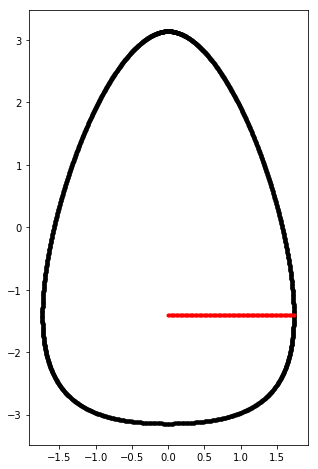

In [10]:
shape_plot()

Here's where I worked to find $\theta$ for the maximum circumference, so I can find the ratio of this circumference to the pole-to-pole distance (which is a real number, and not some multiple of pi).

Below in code is the function:

$\theta_{i+1} = \theta_{i} - \bigg[ \cos{\theta_i} + 0.25\left(\cos{\theta_i}\sinh{\theta_i} + \sin{\theta_i}\cosh{\theta_i}\right) / \left(-\sin{\theta_i} + 0.5\cos{\theta_i}\cosh{\theta_i}\right) \bigg]$

This iterates until $|\theta_{i+1} - \theta{i}| \leq 10^{-5}$.

In [5]:
def xi(t):
    numer = np.cos(t) + (0.25*np.cos(t)*np.sinh(t)) + (0.25*np.sin(t)*np.cosh(t))
    denom = -np.sin(t) + (0.5*np.cos(t)*np.cosh(t))
    g = t - (numer / denom)
    return g

def newt_method(t0):
    counter = 10000
    fail_check = 0
    check_val = 1e-5
    t_p = t0
    for i in range(counter):
        t_n = xi(t_p)
        if np.abs(t_n - t_p) <= check_val:
            t_final = t_n
            break
        else:
            t_p = t_n
        if i+1==counter:
            print('No convergence')
            fail_check = 1
            t_final = t_n
    return t_final,fail_check

t_root,fc = newt_method(np.pi/2)

t_root above is the value for $\theta$ that maximizes the circumference. The pole-to-pole distance is always $d_{pp} = \pi a$. The circumference is defined as $C = 2 \pi a f(\theta)\sin{\theta}$. So the ratio is defined by: $R = 2 f(\theta) \sin(\theta)$.

In [6]:
def circumference(a,t):
    return 2*np.pi*a*np.sin(t)*f(t)
def dpp(a):
    return np.pi*a

c_to_d = circumference(1.0,t_root) / dpp(1.0)
print('Ratio of Circumference to d_pole-to_pole: {:.4f}'.format(c_to_d))

Ratio of Circumference to d_pole-to_pole: 3.1015


Addendum: For this problem, the purpose is to prepare students for different definitions of a metric and what manifold that metric would create. In this, we are still working in two dimenions, with an azimuthally axisymmetric definition about the z-axis ultimately making this a 1-D problem for a 2-D manifold embedded in 3-D.